<a href="https://colab.research.google.com/github/RioDeMilo/Data-analysis-with-python-projects/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/content/fcc-forum-pageviews.csv')


In [ ]:
#!Dont run the code multiple times 
# first i change the index to date and drop the column of the date since the index contains the same value
df['date'] = pd.to_datetime(df['date']) # first of all i passed the date to datetime formazt in pandas 
df = df.rename(columns={'value':'page_views'})
df.index = df['date']# then the index is now the date format
df = df.drop(['date'],axis = 1)# i droped the column date as is now the index


In [ ]:
df.max() , df.min()

(page_views    1173655
 dtype: int64, page_views    1201
 dtype: int64)

In [ ]:
# be sure to only run one time this line beacuse it will update the values and the quantiles will be normal data if you run it over
#here we al cleaning all te values that are greates than the 97.5 percentile an smaller than the 2.5 percentile
df = df[(df['page_views']<= df['page_views'].quantile(0.975)) & (df['page_views'] >= df['page_views'].quantile(0.025))]



Text(0, 0.5, 'Page Views')

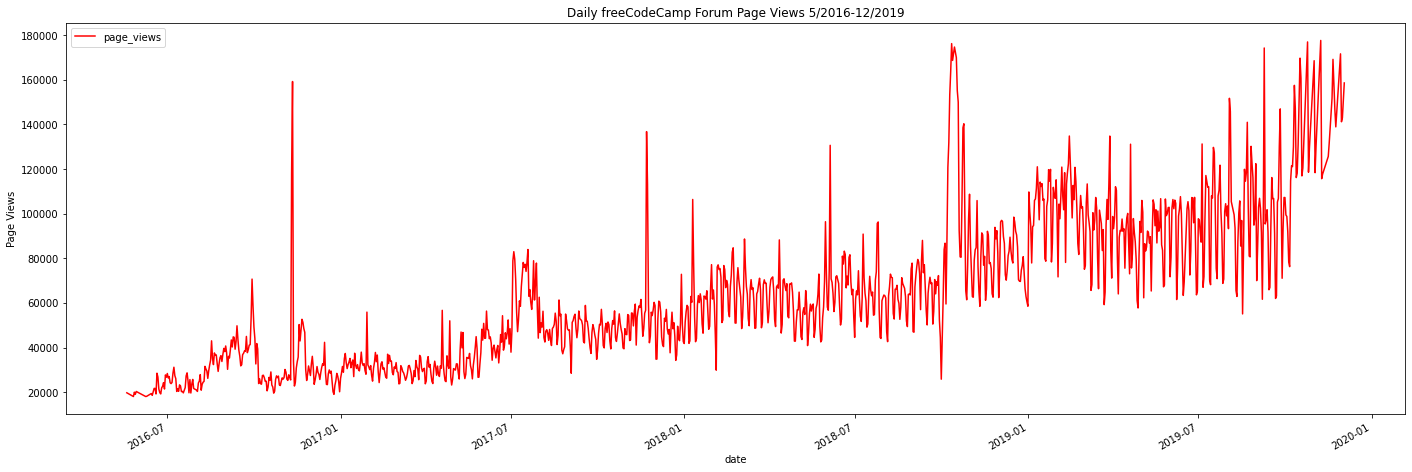

In [ ]:
# this works fine but for  a fucntion we should call the ax to be stored 
df.plot( figsize=(24,8),color = 'Red', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019' )
plt.ylabel('Page Views')

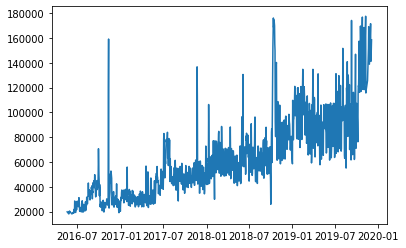

In [ ]:
fig = plt.plot(df)

In [ ]:
df['Year'] = df.index.year
df['Month']= df.index.month_name()
df

<ipython-input-54-ad07ff6b96d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year
<ipython-input-54-ad07ff6b96d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df.index.month_name()


,page_views,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [ ]:
# the list is to give a order to the data set 
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
#we aplied that order and 
df['Month']=pd.Categorical(df['Month'],categories=sort_order)

<ipython-input-63-d7ca26f020da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.Categorical(df['Month'],categories=sort_order)


In [ ]:
df_pivot = pd.pivot_table(
    df,
    values="page_views",
    index="Year",
    columns="Month",
    aggfunc=np.mean
    )


In [ ]:
df_pivot

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0, 0.5, 'Average Page Views')

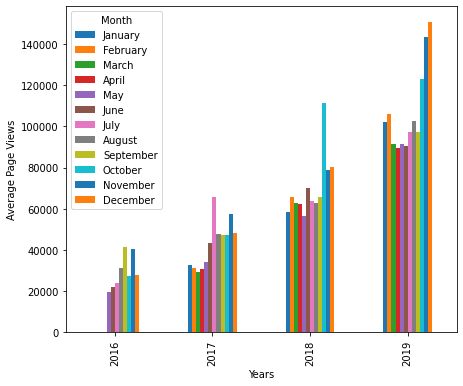

In [ ]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

In [ ]:
#here i tried to do somthing similar by diving by periods of time the dataset
x = (df.groupby(pd.PeriodIndex(df['date'], freq="M"))['value'].mean())
x = pd.DataFrame(x)
x.groupby(df['date'].dt.year)['value']

In [ ]:
x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
#!Dont run the code multiple times 
# first i change the index to date and drop the column of the date since the index contains the same value
df['date'] = pd.to_datetime(df['date']) # first of all i passed the date to datetime formazt in pandas 
df = df.rename(columns={'value':'page_views'})
df.index = df['date']# then the index is now the date format
df = df.drop(['date'],axis = 1)# i droped the column date as is now the index
# Clean data
df = df[(df['page_views'] <= df['page_views'].quantile(0.975)) & (df['page_views'] >= df['page_views'].quantile(0.025))]


def draw_line_plot():
    # Draw line plot
    fig = plt.plot(df)
    plt.ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['Year'] = df.index.year
    df['Month'] = df.index.month_name()
    # the list is to give a order to the data set
    sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                  'November', 'December']
    # we aplied that order and
    df['Month'] = pd.Categorical(df['Month'], categories=sort_order)
    df_pivot = pd.pivot_table(
        df,
        values="page_views",
        index="Year",
        columns="Month",
        aggfunc=np.mean
    )

    # Draw bar plot
    ax = df_pivot.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    # Change the plot dimensions (width, height)
    fig.set_size_inches(7, 6)
    # Change the axes labels
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig